In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [3]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [4]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [5]:
from tensorflow.keras.layers import MaxPooling2D

In [6]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [7]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [8]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [10]:
training_set

In [11]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [12]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 36s 3s/step - loss: 2.3462 - accuracy: 0.5337 - val_loss: 0.6710 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 19s 1s/step - loss: 0.7115 - accuracy: 0.5409 - val_loss: 0.7377 - val_accuracy: 0.3955
Epoch 3/50
13/13 [==============================] - 20s 2s/step - loss: 0.6420 - accuracy: 0.6394 - val_loss: 0.8448 - val_accuracy: 0.3582
Epoch 4/50
13/13 [==============================] - 19s 1s/step - loss: 0.6135 - accuracy: 0.6875 - val_loss: 1.1854 - val_accuracy: 0.3507
Epoch 5/50
13/13 [==============================] - 18s 1s/step - loss: 0.7357 - accuracy: 0.5673 - val_loss: 0.6678 - val_accuracy: 0.6791
Epoch 6/50
13/13 [==============================] - 18s 1s/step - loss: 0.6009 - accuracy: 0.7139 - val_loss: 0.7470 - val_accuracy: 0.3806
Epoch 7/50
13/13 [==============================] - 18s 1s/step - loss: 0.5169 - acc

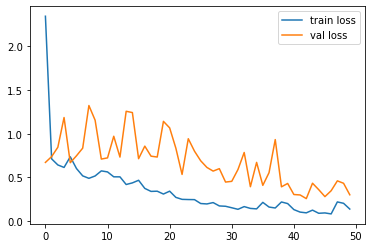

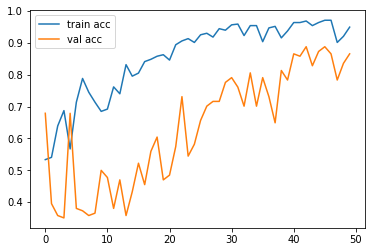

<Figure size 432x288 with 0 Axes>

In [13]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_cnn.h5')

In [24]:

y_pred = model.predict(test_set)


In [25]:
y_pred

array([[2.27115035e-01, 7.72885025e-01],
       [9.59574282e-01, 4.04256955e-02],
       [1.86208174e-01, 8.13791871e-01],
       [9.99919415e-01, 8.05987947e-05],
       [1.72278106e-01, 8.27721894e-01],
       [5.19086540e-01, 4.80913430e-01],
       [9.98160660e-01, 1.83940586e-03],
       [9.56346869e-01, 4.36531231e-02],
       [7.13131726e-02, 9.28686798e-01],
       [9.99903321e-01, 9.66625012e-05],
       [9.77766156e-01, 2.22338475e-02],
       [9.95662868e-01, 4.33715293e-03],
       [8.31386149e-01, 1.68613851e-01],
       [6.38314426e-01, 3.61685634e-01],
       [9.96794164e-01, 3.20586003e-03],
       [9.99849796e-01, 1.50187712e-04],
       [1.36551619e-01, 8.63448381e-01],
       [7.13245213e-01, 2.86754817e-01],
       [2.40400452e-02, 9.75959957e-01],
       [9.98702288e-01, 1.29771128e-03],
       [9.82118964e-01, 1.78810582e-02],
       [7.39954636e-02, 9.26004469e-01],
       [8.64774168e-01, 1.35225803e-01],
       [1.07281171e-01, 8.92718792e-01],
       [9.998710

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('model_cnn.h5')

In [30]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [31]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

In [37]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
